
# Week 5 — Exploring Variable Associations

In this practical notebook you'll learn to **explore relationships between variables** using:
- **Scatter plots** and **pair plots**
- **Linear and non-linear associations**
- **Pearson** and **Spearman** correlations
- **Strength vs. significance** (effect size vs p-value)

We will use classic open datasets (via `seaborn`) such as **penguins**, **mpg**, **tips**, and **anscombe**.
Each section mixes **brief explanations**, **worked examples**, and **exercises** for you to practice.


## Setup

In [1]:
# if you have not installed these packages yet, uncomment and run the following lines:
#!pip install seaborn
#!pip install scipy

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

pd.set_option("display.max_rows", 10)
pd.set_option("display.precision", 3)
sns.set_theme(context="notebook")

penguins = sns.load_dataset("penguins").dropna()
mpg = sns.load_dataset("mpg").dropna()
tips = sns.load_dataset("tips").dropna()
anscombe = sns.load_dataset("anscombe")

penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male



## 1. Scatter Plots


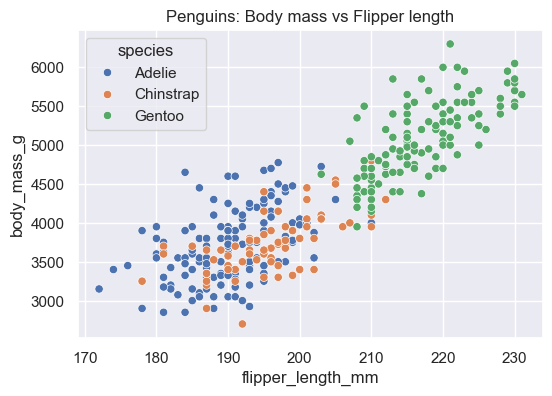

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="body_mass_g", hue="species", ax=ax)
ax.set_title("Penguins: Body mass vs Flipper length")
plt.show()


### Exercise 1 — Basic scatter
Create a scatter plot of **bill length vs bill depth** for penguins and color by species.
- Add modest transparency (`alpha`) to handle overplotting.
- Briefly interpret the shape and separation between species.


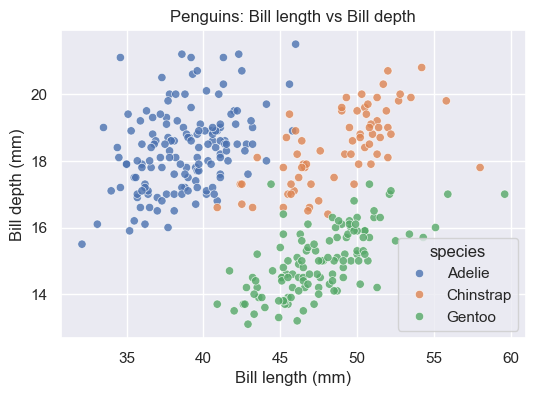

Species form partially separated clusters; relationship differs by species (possible Simpson’s paradox).


In [4]:

# Solution: Penguins — bill length vs bill depth (colored by species)
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm",
    hue="species", alpha=0.8, ax=ax
)
ax.set_title("Penguins: Bill length vs Bill depth")
ax.set_xlabel("Bill length (mm)")
ax.set_ylabel("Bill depth (mm)")
plt.show()
print("Species form partially separated clusters; relationship differs by species (possible Simpson’s paradox).")


## 2. Pair Plots

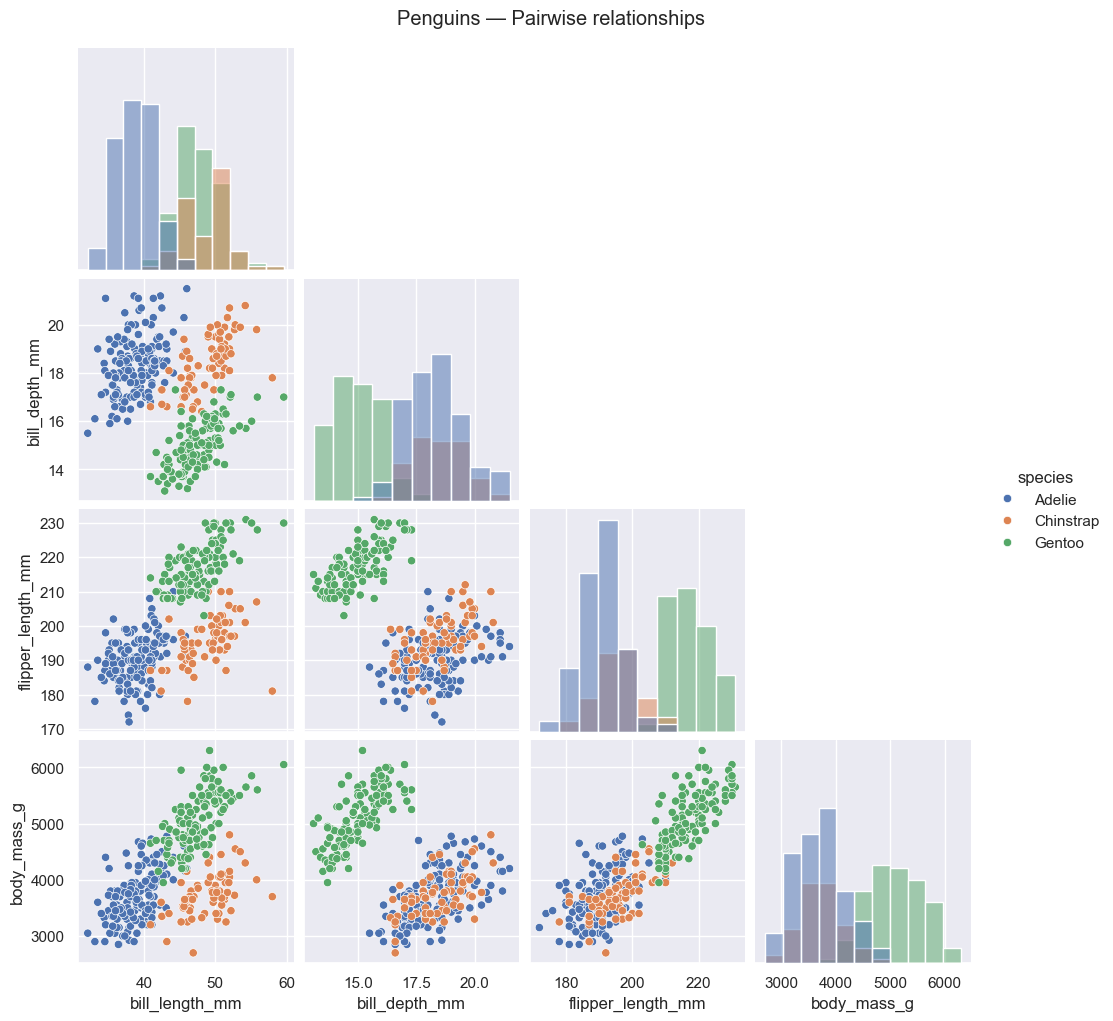

In [5]:
num_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
sns.pairplot(penguins[num_cols + ["species"]], hue="species", diag_kind="hist", corner=True)
plt.suptitle("Penguins — Pairwise relationships", y=1.02)
plt.show()


The pair plot is a great way to visualize relationships between multiple variables at once. It creates a matrix of scatter plots for each pair of variables, along with histograms or density plots on the diagonal.

### Exercise 2 — Pair plot with a subset
Using the **mpg** dataset, create a pair plot for the variables `["mpg", "horsepower", "weight", "acceleration"]`.
- Use `hue="origin"`.
- Use `corner=True`.
- Briefly describe any non-linear patterns you notice.


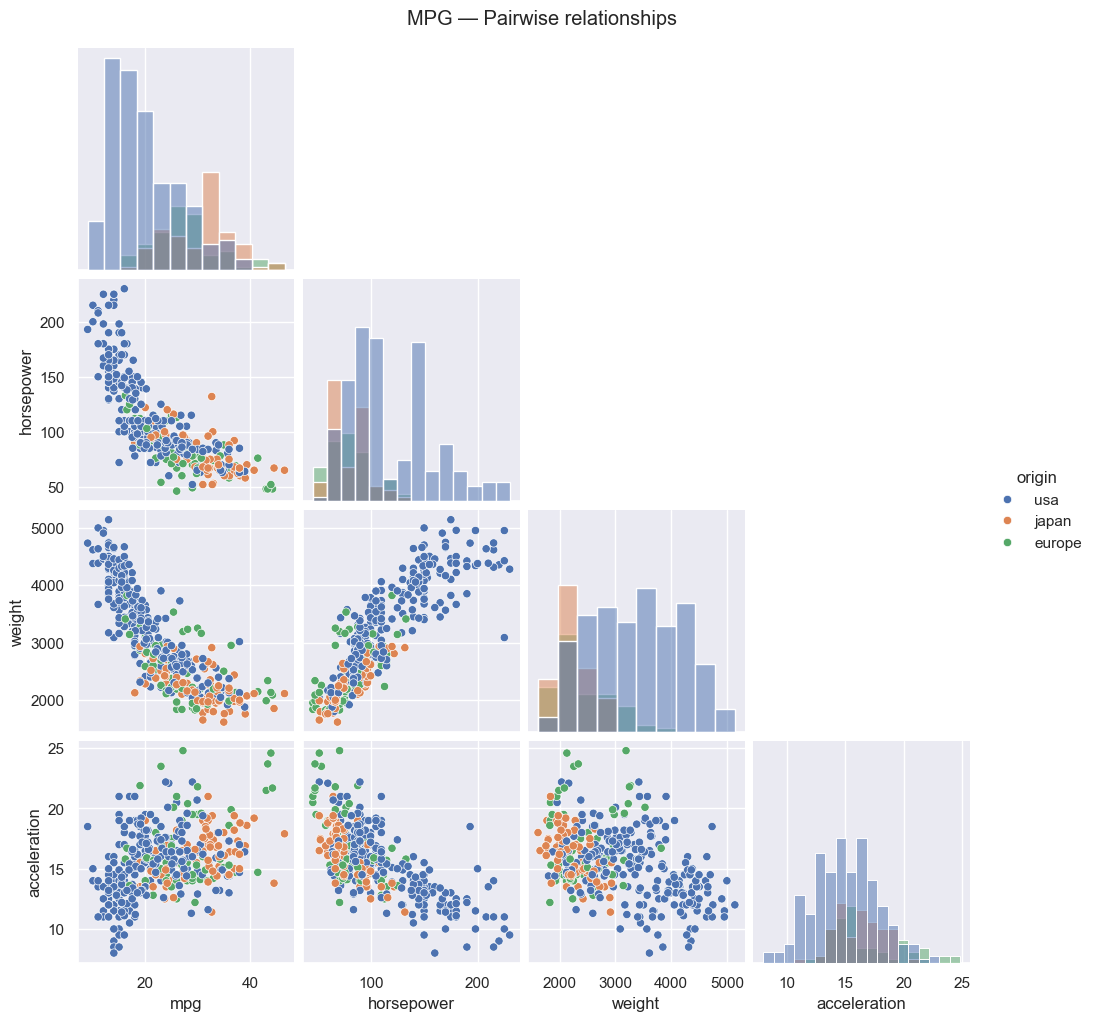

Non-linear patterns: mpg decreases with horsepower and weight; acceleration is more weakly related.


In [6]:

# Solution: Pair plot on mpg variables with origin as hue
cols = ["mpg", "horsepower", "weight", "acceleration"]
sns.pairplot(mpg[cols + ["origin"]], hue="origin", corner=True, diag_kind="hist")
plt.suptitle("MPG — Pairwise relationships", y=1.02)
plt.show()
print("Non-linear patterns: mpg decreases with horsepower and weight; acceleration is more weakly related.")


## 3. Linear and Non-linear Associations

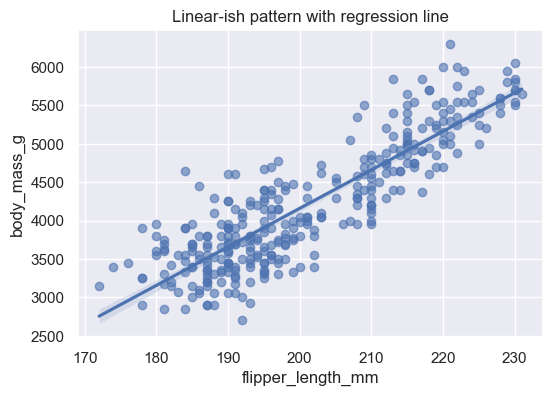

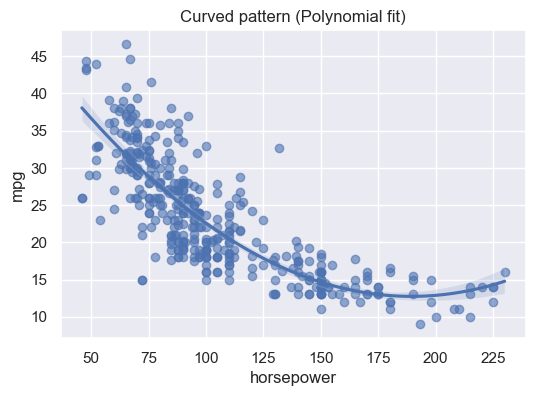

In [7]:

fig, ax = plt.subplots(figsize=(6, 4))
sns.regplot(data=penguins, x="flipper_length_mm", y="body_mass_g", ax=ax, scatter_kws=dict(alpha=0.6))
ax.set_title("Linear-ish pattern with regression line")
plt.show()

fig, ax = plt.subplots(figsize=(6, 4))
sns.regplot(data=mpg, x="horsepower", y="mpg", order=2, ax=ax, scatter_kws=dict(alpha=0.6))
ax.set_title("Curved pattern (Polynomial fit)")
plt.show()


### Exercise 3 — Non-linear detection
Using **tips**, check whether `total_bill` and `tip` are strictly linear.  
1. Draw a regular scatter plot.  
2. Overlay a straight regression line.  


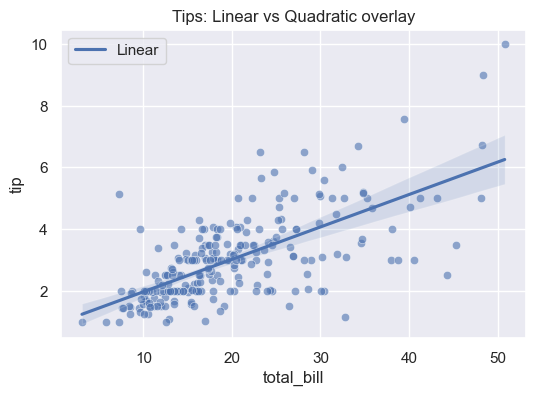

In [25]:

# Solution: Tips — compare linear vs quadratic fits
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=tips, x="total_bill", y="tip", ax=ax, alpha=0.6)
sns.regplot(data=tips, x="total_bill", y="tip", ax=ax, scatter=False, label="Linear")
ax.legend()
ax.set_title("Tips: Linear vs Quadratic overlay")
plt.show()


## 4. Pearson vs Spearman Correlations

Pearson r = -0.778 (p = 7.03e-81)
Spearman r = -0.854 (p = 1.62e-112)


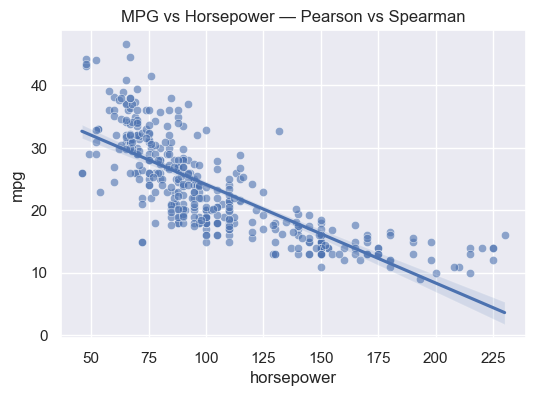

In [9]:
x = mpg["horsepower"]
y = mpg["mpg"]

r_pearson, p_pearson = pearsonr(x, y)
r_spearman, p_spearman = spearmanr(x, y)

print(f"Pearson r = {r_pearson:.3f} (p = {p_pearson:.2e})")
print(f"Spearman r = {r_spearman:.3f} (p = {p_spearman:.2e})")

fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(x=x, y=y, ax=ax, alpha=0.6)
sns.regplot(x=x, y=y, ax=ax, scatter=False, color=None)
ax.set_title("MPG vs Horsepower — Pearson vs Spearman")
plt.show()


### Exercise 4 — Monotonic but non-linear
Create a **synthetic** dataset where `y = log(x) + noise` for `x` in `[1, 100]`.  
- Compute **Pearson** and **Spearman** correlations between `x` and `y`.  


Pearson r = 0.902, p = 1.47e-110
Spearman r = 0.995, p = 3.58e-304


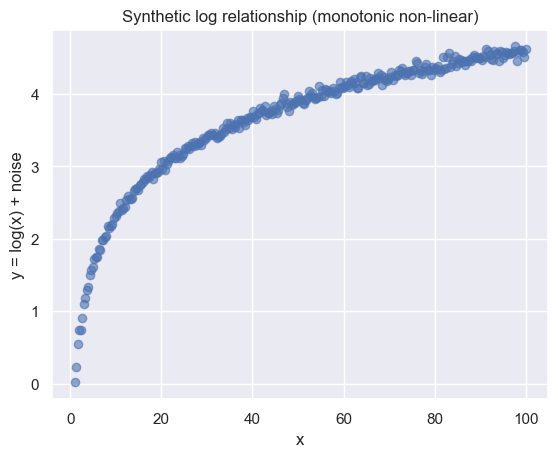

In [10]:

# Solution: Synthetic monotonic non-linear relation (log)
rng = np.random.default_rng(42)
x = np.linspace(1, 100, 300)
y = np.log(x) + rng.normal(0, 0.05, size=x.size)

r_p, p_p = pearsonr(x, y)
r_s, p_s = spearmanr(x, y)

print(f"Pearson r = {r_p:.3f}, p = {p_p:.2e}")
print(f"Spearman r = {r_s:.3f}, p = {p_s:.2e}")

plt.scatter(x, y, alpha=0.6)
plt.title("Synthetic log relationship (monotonic non-linear)")
plt.xlabel("x"); plt.ylabel("y = log(x) + noise")
plt.show()


`Note`: Pearson correlation captures linear relationships, while Spearman correlation captures monotonic relationships.

- if your data is linear, both correlations will be high and similar.
- if your data is monotonic but non-linear, Spearman will be higher than Pearson.
- when there is a curvy relationship, Pearson may be low even if there is a strong association while Spearman will be high.

## 5. Strength vs Significance (Effect size vs p-value)

In [11]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

rng = np.random.default_rng(7)

def simulate_corr(n=50, true_r=0.2, noise=1.0, seed=None):
    rng = np.random.default_rng(seed)
    x = rng.normal(size=n)
    y = true_r * x + rng.normal(scale=noise, size=n)
    rp, pp = pearsonr(x, y)
    rs, ps = spearmanr(x, y)
    return rp, pp, rs, ps

for n in [30, 100, 1000, 10000]:
    rp, pp, rs, ps = simulate_corr(n=n, true_r=0.08, noise=1.0, seed=123)
    print(f"n={n:<5} | Pearson r={rp:.3f}, p={pp:.2e} | Spearman r={rs:.3f}, p={ps:.2e}")


n=30    | Pearson r=0.132, p=4.88e-01 | Spearman r=0.147, p=4.39e-01
n=100   | Pearson r=0.133, p=1.88e-01 | Spearman r=0.151, p=1.34e-01
n=1000  | Pearson r=0.104, p=9.85e-04 | Spearman r=0.100, p=1.50e-03
n=10000 | Pearson r=0.082, p=3.11e-16 | Spearman r=0.081, p=5.67e-16


### Exercise 5 — Visualize strength vs significance
1. For sample sizes `n = [25, 50, 100, 500, 2000]`, simulate correlations from a weak linear process (true_r ≈ 0.1).  
2. For each `n`, run, say, 200 trials and collect the distribution of **Pearson r** and p-values.  
3. Summarize with a small table and comment on how often `p < 0.05` occurs as `n` grows.


In [ ]:
# Solution: Strength vs significance across sample sizes
rng = np.random.default_rng(0)

def trial(n, true_r=0.1):
    x = rng.normal(size=n)
    y = true_r * x + rng.normal(size=n)
    r, p = pearsonr(x, y)
    return r, p

rows = []
for n in [25, 50, 100, 500, 2000]:
    rs, ps = zip(*(trial(n) for _ in range(200)))
    rows.append({
        "n": n,
        "r_mean": float(np.mean(rs)),
        "r_std": float(np.std(rs, ddof=1)),
        "p<0.05_rate": float(np.mean(np.array(ps) < 0.05))
    })

summary = pd.DataFrame(rows)
display(summary)
print("Bigger n -> more power to detect small effects; effect size stays small.")


,n,r_mean,r_std,p<0.05_rate
0,25,0.083,0.182,0.04
1,50,0.082,0.159,0.13
2,100,0.099,0.095,0.15
3,500,0.095,0.045,0.58
4,2000,0.100,0.022,0.99


Bigger n -> more power to detect small effects; effect size stays small.


## 6. Case Study — Multi-variable associations

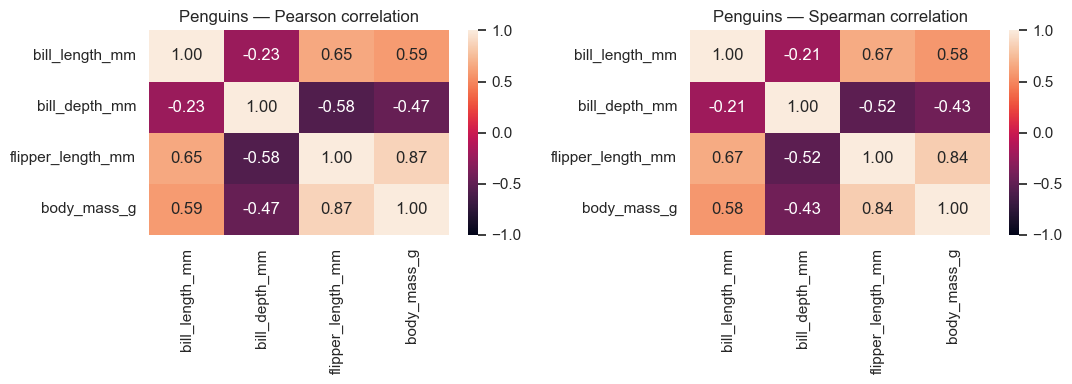

In [13]:
num_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
pearson_corr = penguins[num_cols].corr(method="pearson")
spearman_corr = penguins[num_cols].corr(method="spearman")

fig, axes = plt.subplots(1, 2, figsize=(11, 4))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title("Penguins — Pearson correlation")
sns.heatmap(spearman_corr, annot=True, fmt=".2f", vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title("Penguins — Spearman correlation")
plt.tight_layout()
plt.show()


### Exercise 6 — Top correlated pairs
Using **mpg**, compute the Pearson correlation matrix for `["mpg","displacement","horsepower","weight","acceleration"]`.  
- List the **top 3 strongest negative** and **top 3 strongest positive** correlations (by absolute value).  
- Briefly explain any domain intuition (e.g., heavier cars → lower mpg).


In [ ]:
# Solution: Top correlated pairs in mpg
cols = ["mpg","displacement","horsepower","weight","acceleration"]
corr = mpg[cols].corr()
corr_abs = corr.abs()
np.fill_diagonal(corr_abs.values, 0)
pairs = (
    corr_abs.where(np.triu(np.ones_like(corr_abs, dtype=bool), k=1))
    .stack()
    .sort_values(ascending=False)
)
top_pos = pairs.head(3)
top_neg = (-pairs).sort_values(ascending=False).head(3)

display(corr)
print("\nTop 3 strongest by |r|:")
display(pairs.head(6))
print("\nTop 3 positive:")
display(top_pos)
print("\nTop 3 negative:")
display(top_neg)


,mpg,displacement,horsepower,weight,acceleration
mpg,1.000,-0.805,-0.778,-0.832,0.423
displacement,-0.805,1.000,0.897,0.933,-0.544
horsepower,-0.778,0.897,1.000,0.865,-0.689
weight,-0.832,0.933,0.865,1.000,-0.417
acceleration,0.423,-0.544,-0.689,-0.417,1.000



Top 3 strongest by |r|:


displacement  weight          0.933
              horsepower      0.897
horsepower    weight          0.865
mpg           weight          0.832
              displacement    0.805
              horsepower      0.778
dtype: float64


Top 3 positive:


displacement  weight        0.933
              horsepower    0.897
horsepower    weight        0.865
dtype: float64


Top 3 negative:


weight        acceleration   -0.417
mpg           acceleration   -0.423
displacement  acceleration   -0.544
dtype: float64

## 7. Be careful — Outliers and Anscombe's Quartet

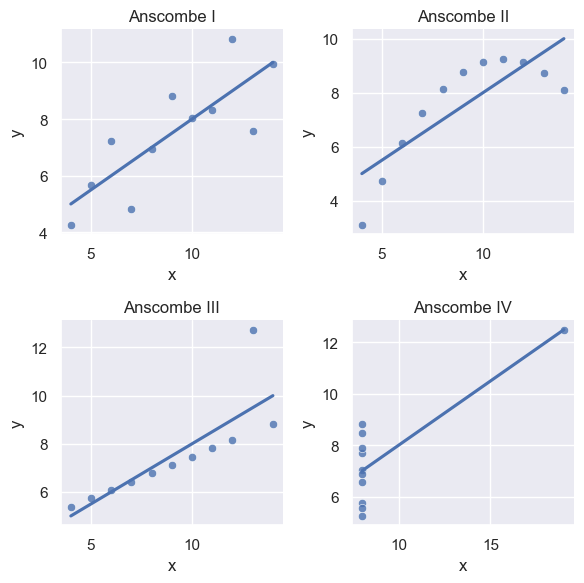

In [15]:
g = sns.FacetGrid(anscombe, col="dataset", col_wrap=2, height=3, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x="x", y="y", alpha=0.8)
g.set_titles(col_template="Anscombe {col_name}")
for ax, (_, sub) in zip(g.axes.flatten(), anscombe.groupby("dataset")):
    sns.regplot(data=sub, x="x", y="y", scatter=False, ax=ax, ci=None)
plt.tight_layout()
plt.show()


The Asncombe's quartet is a set of four datasets that have nearly identical simple statistical properties, yet appear very different when graphed. This illustrates the importance of visualizing data before analyzing it.


## 8. Summary & Checklist
- Use **scatter plots** and **pair plots** to visualize relationships.
- Decide between **Pearson** (linear) and **Spearman** (monotonic) correlations.
- Consider both **effect size** (strength) and **statistical significance**.
- **Visualize** to detect outliers, non-linear patterns, and clusters.
- Provide **domain interpretation** — numbers alone rarely tell the full story.



# 9. Comprehensive EDA Practice — Exploring Diamonds

Apply a complete **EDA workflow** on **`diamonds`**:
univariate, bivariate, multivariate, non-linear patterns, and insights.


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(context="notebook")
diamonds = sns.load_dataset("diamonds")
diamonds.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 9.1 Dataset Overview and Cleaning

Inspect structure, missing values, and summary statistics

In [28]:
# Your code here
diamonds.info()
print("\nMissing values per column:")
print(diamonds.isna().sum())
print("\nDescribe numeric columns:")
diamonds.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB

Missing values per column:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Describe numeric columns:


,carat,depth,table,price,x,y,z
count,53940.000,53940.000,53940.000,53940.00,53940.000,53940.000,53940.000
mean,0.798,61.749,57.457,3932.80,5.731,5.735,3.539
std,0.474,1.433,2.234,3989.44,1.122,1.142,0.706
min,0.200,43.000,43.000,326.00,0.000,0.000,0.000
25%,0.400,61.000,56.000,950.00,4.710,4.720,2.910
50%,0.700,61.800,57.000,2401.00,5.700,5.710,3.530
75%,1.040,62.500,59.000,5324.25,6.540,6.540,4.040
max,5.010,79.000,95.000,18823.00,10.740,58.900,31.800


## 9.2 Univariate Exploration

Plot distributions for 'carat' and 'price' and a boxplot of 'price' by 'cut'

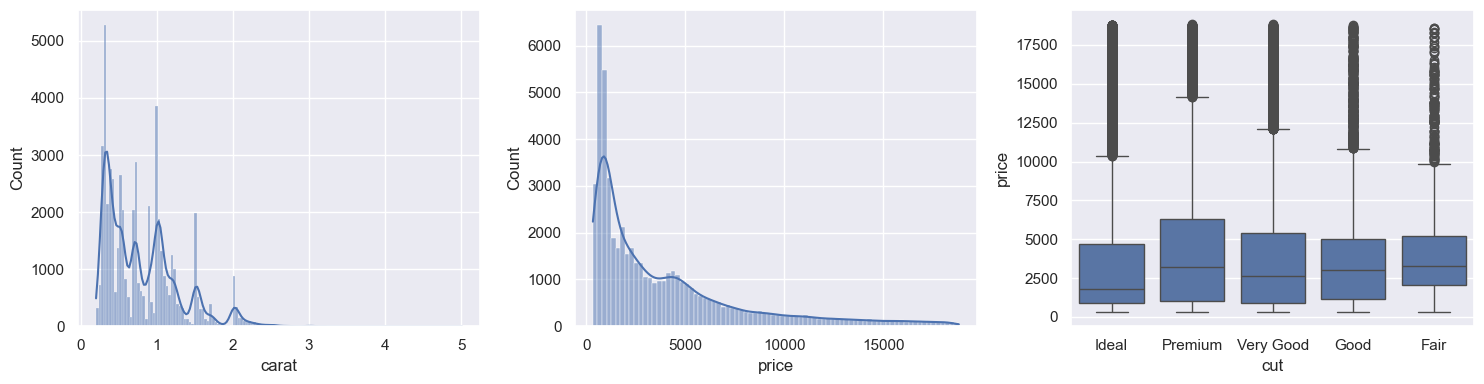

Price distribution is right-skewed, and higher cuts generally yield higher prices.


In [27]:
# Your code here
fig, axes = plt.subplots(1, 3, figsize=(15,4))
sns.histplot(diamonds["carat"], kde=True, ax=axes[0])
sns.histplot(diamonds["price"], kde=True, ax=axes[1])
sns.boxplot(x=diamonds["cut"], y=diamonds["price"], ax=axes[2])
plt.tight_layout()
plt.show()
print("Price distribution is right-skewed, and higher cuts generally yield higher prices.")

## 9.3 Bivariate Analysis (Numerical–Numerical)

Scatter carat vs price (hue=cut) + Pearson & Spearman correlations

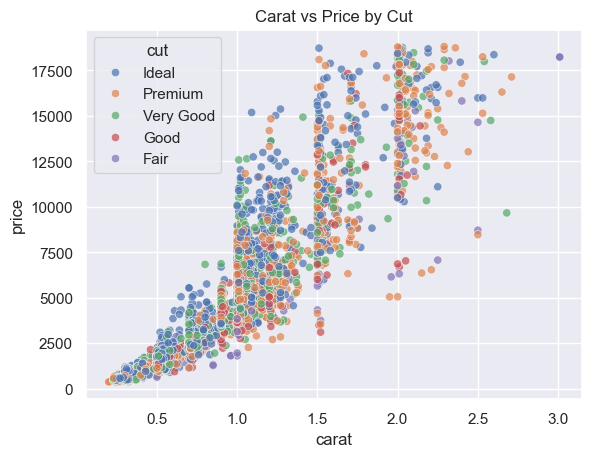

Pearson: 0.922, Spearman: 0.963


In [26]:
# Your code here
sns.scatterplot(data=diamonds.sample(5000), x="carat", y="price", hue="cut", alpha=0.7)
plt.title("Carat vs Price by Cut")
plt.show()

r_p = diamonds["carat"].corr(diamonds["price"], method="pearson")
r_s = diamonds["carat"].corr(diamonds["price"], method="spearman")
print(f"Pearson: {r_p:.3f}, Spearman: {r_s:.3f}")

## 9.4 Categorical vs Numerical Relationships

Boxplot of price by color and cut

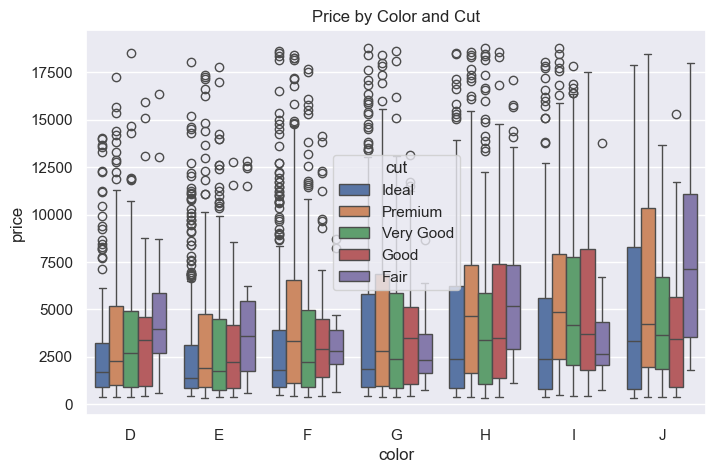

Cut and color both influence price; premium cuts tend to increase price across all colors.


In [29]:
# Your code here

plt.figure(figsize=(8,5))
sns.boxplot(data=diamonds.sample(5000), x="color", y="price", hue="cut")
plt.title("Price by Color and Cut")
plt.show()
print("Cut and color both influence price; premium cuts tend to increase price across all colors.")


## 9.5 Correlation and Multivariate View

Compute and plot correlation matrix; list top correlations with price

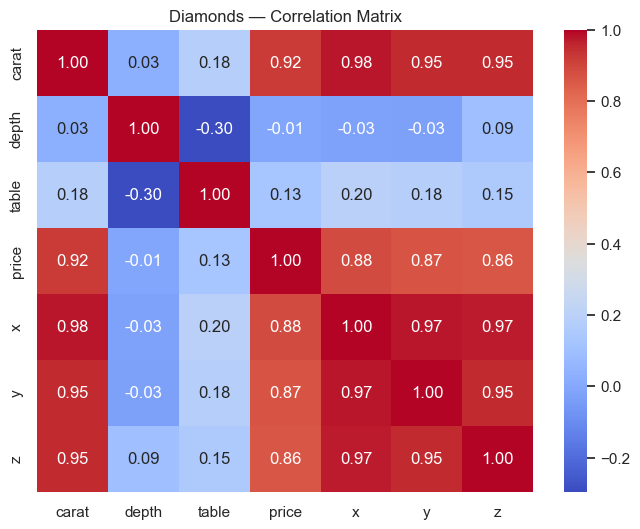

Strongest correlation: carat and price (~0.92). Depth and table have weak correlation with price.


In [30]:
# Your code here
num_cols = diamonds.select_dtypes(include='number')
corr = num_cols.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Diamonds — Correlation Matrix")
plt.show()
print("Strongest correlation: carat and price (~0.92). Depth and table have weak correlation with price.")

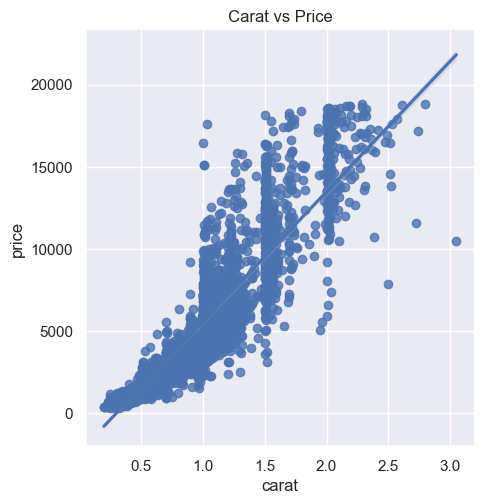

Price increases exponentially with carat.


In [33]:

sns.lmplot(data=diamonds.sample(5000), x="carat", y="price")
plt.title("Carat vs Price")
plt.show()
print("Price increases exponentially with carat.")

## 9.7 Mini Challenges


**Solve:**
1) Which variable correlates most strongly with **price**?  
2) How does **clarity** impact price when **controlling for carat**?  
3) Top **3 most expensive** diamonds per **cut**.  
4) Are higher-quality **cuts** also **heavier (carat)** on average?  
5) Visualize **depth vs price** and discuss the **strength** of that relationship.


price    1.000
carat    0.922
x        0.884
y        0.865
z        0.861
Name: price, dtype: float64


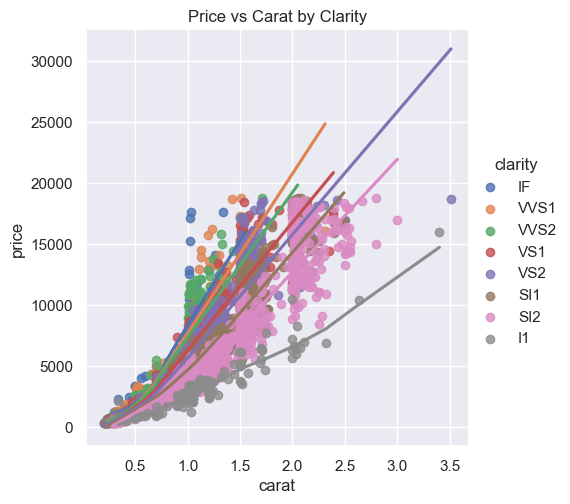

C:\Users\TG\AppData\Local\Temp\ipykernel_23780\595147409.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top3 = diamonds.sort_values("price", ascending=False).groupby("cut").head(3)[["cut","price","carat","color","clarity"]]
C:\Users\TG\AppData\Local\Temp\ipykernel_23780\595147409.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_carat = diamonds.groupby("cut")["carat"].mean().sort_values(ascending=False)


             cut  price  carat color clarity
27749    Premium  18823   2.29     I     VS2
27748  Very Good  18818   2.00     G     SI1
27747      Ideal  18806   1.51     G      IF
27746      Ideal  18804   2.07     G     SI2
27745  Very Good  18803   2.00     H     SI1
...          ...    ...    ...   ...     ...
27682       Good  18707   2.07     I     VS2
27672       Good  18686   2.67     F     SI2
27646       Fair  18574   2.01     G     SI1
27643       Fair  18565   2.02     H     VS2
27630       Fair  18531   4.50     J      I1

[15 rows x 5 columns]
cut
Fair         1.046
Premium      0.892
Good         0.849
Very Good    0.806
Ideal        0.703
Name: carat, dtype: float64


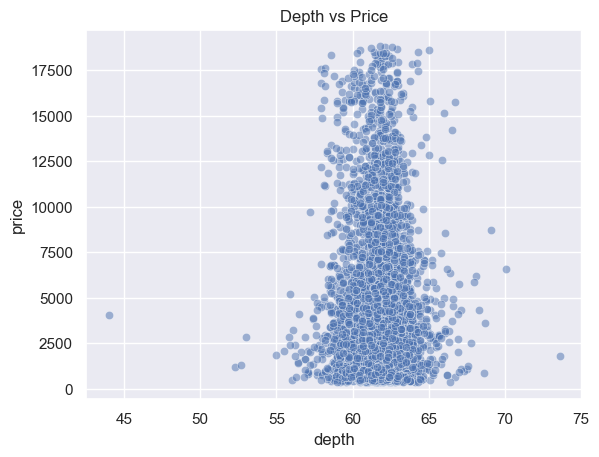

In [34]:
# Your code here

# 1. Strongest correlation
corr_with_price = num_cols.corr()["price"].sort_values(ascending=False)
print(corr_with_price.head())

# 2. Clarity vs price controlling for carat
sns.lmplot(data=diamonds.sample(8000), x="carat", y="price", hue="clarity", lowess=True)
plt.title("Price vs Carat by Clarity")
plt.show()

# 3. Top 3 per cut
top3 = diamonds.sort_values("price", ascending=False).groupby("cut").head(3)[["cut","price","carat","color","clarity"]]
print(top3)

# 4. Average carat by cut
avg_carat = diamonds.groupby("cut")["carat"].mean().sort_values(ascending=False)
print(avg_carat)

# 5. Depth vs price
sns.scatterplot(data=diamonds.sample(5000), x="depth", y="price", alpha=0.5)
plt.title("Depth vs Price")
plt.show()


## 9.8 Summary & Reflection


Write a short narrative summarizing your insights: main drivers of price, linear vs non-linear patterns, role of categorical factors.


In [23]:
# Your narrative here

**Summary of Findings:**
- **Carat** is the dominant factor influencing price (strong linear & exponential growth).
- **Cut, clarity, and color** modulate price but with smaller effect sizes.
- Depth and table have minimal correlation with price.
- Always visualize: boxplots and scatter plots reveal more about the data than just the numbers.
